In [17]:
import pandas as pd

In [18]:
df = pd.read_excel('Scoringdata.xls')

In [19]:
df_copy = df.copy()

In [20]:
df_copy = df_copy.drop(['ID Prêt','Date Déblocage'], axis =1)

# Crie um dicionário com mapeamento de nomes antigos para novos
name_mapping = {
    'Maturité mois': 'Meses de vencimento',
    'Montant Prêt BAM': 'Valor do empréstimo BAM',
    'Sexe': 'Sexo',
    'Etat Civil': 'Estado Civil',
    'Niveau Formation':'Nivel de formacao',
    'Age ans':'Anos de idade',
    "Ans à l'adresse":'Anos no endereco',
    "Locataire / Propriétaire": 'Proprietario do inquilino',
    'Nbre de Dépendants': 'Numero de dependentes',
    'Ans en Activité ':'Anos em atividade',
    "Emplacement du business":'Localizacao da empresa',
    'Crédit Bureau négatif=1':'Credito de Escritorio Negativo=1',
    'NbreEmployésFamille':'Numero Funcionarios Familia',
    "Type d'Activité":'Tipo de atividade',
    'Ventes Mensuelles BAM':'Vendas Mensais BAM'}

# Use o método 'rename' para redefinir os nomes das colunas
df_copy.rename(columns=name_mapping, inplace=True)


In [21]:
from pycaret.classification import*
st = setup(data =df_copy, target = 'Bad91d+=1',session_id=123)

In [22]:
best_model = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:05:21
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


In [23]:
xgboost = create_model('xgboost')

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:05:44
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9695,0.9959,0.9706,0.9802,0.9754,0.9354,0.9355
1,0.9634,0.9855,0.9510,0.9898,0.9700,0.9232,0.9244
2,0.9878,0.9975,0.9804,1.0000,0.9901,0.9742,0.9746
3,0.9693,0.9947,0.9604,0.9898,0.9749,0.9355,0.9362
4,0.9632,0.9950,0.9604,0.9798,0.9700,0.9224,0.9227
5,0.9816,0.9923,0.9706,1.0000,0.9851,0.9611,0.9618
6,0.9632,0.9887,0.9706,0.9706,0.9706,0.9214,0.9214
7,0.9632,0.9892,0.9608,0.9800,0.9703,0.9219,0.9222
8,0.9755,0.9989,0.9902,0.9712,0.9806,0.9473,0.9476


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9695,0.9959,0.9706,0.9802,0.9754,0.9354,0.9355
1,0.9634,0.9855,0.9510,0.9898,0.9700,0.9232,0.9244
2,0.9878,0.9975,0.9804,1.0000,0.9901,0.9742,0.9746
3,0.9693,0.9947,0.9604,0.9898,0.9749,0.9355,0.9362
4,0.9632,0.9950,0.9604,0.9798,0.9700,0.9224,0.9227
5,0.9816,0.9923,0.9706,1.0000,0.9851,0.9611,0.9618
6,0.9632,0.9887,0.9706,0.9706,0.9706,0.9214,0.9214
7,0.9632,0.9892,0.9608,0.9800,0.9703,0.9219,0.9222
8,0.9755,0.9989,0.9902,0.9712,0.9806,0.9473,0.9476


In [24]:
tuned_xgboost = tune_model(xgboost)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,12:05:48
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9756,0.9964,0.9608,1.0000,0.9800,0.9488,0.9500
1,0.9695,0.9889,0.9510,1.0000,0.9749,0.9362,0.9381
2,0.9817,0.9984,0.9706,1.0000,0.9851,0.9615,0.9622
3,0.9693,0.9954,0.9505,1.0000,0.9746,0.9359,0.9378
4,0.9693,0.9939,0.9505,1.0000,0.9746,0.9359,0.9378
5,0.9632,0.9944,0.9412,1.0000,0.9697,0.9229,0.9257
6,0.9877,0.9931,0.9804,1.0000,0.9901,0.9740,0.9743
7,0.9755,0.9868,0.9608,1.0000,0.9800,0.9483,0.9496
8,0.9877,0.9963,0.9804,1.0000,0.9901,0.9740,0.9743


Fitting 10 folds for each of 10 candidates, totalling 100 fits


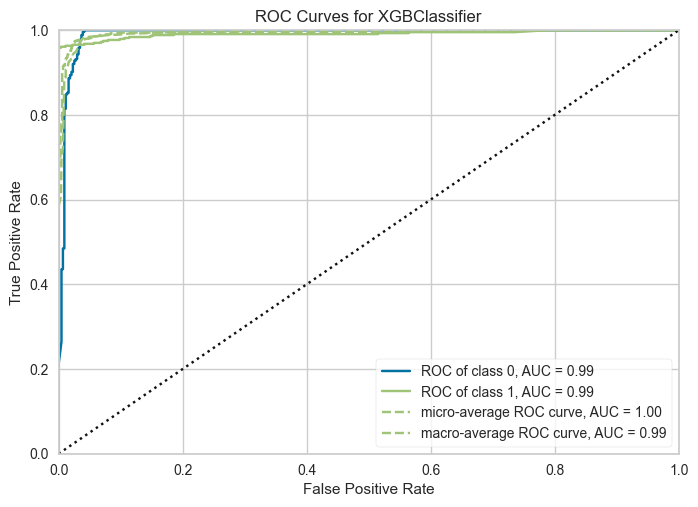

In [25]:
plot_model(tuned_xgboost, plot='auc')

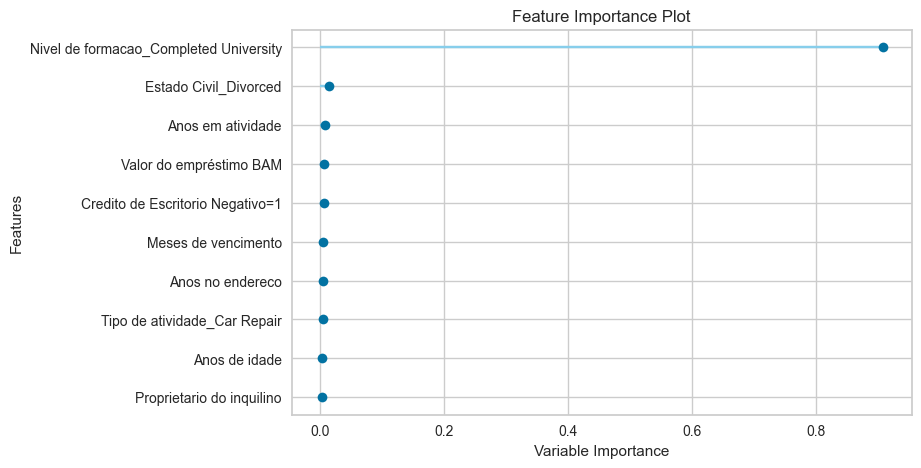

In [26]:
plot_model(tuned_xgboost,plot='feature')

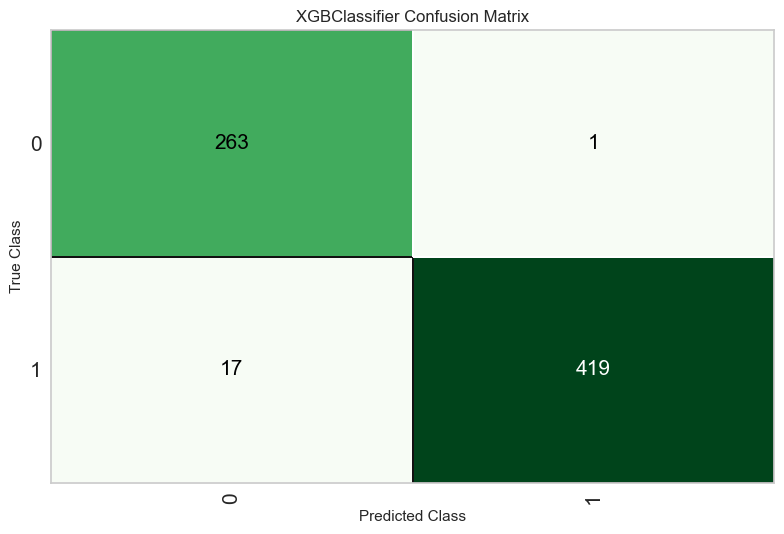

In [27]:
plot_model(tuned_xgboost, plot='confusion_matrix')

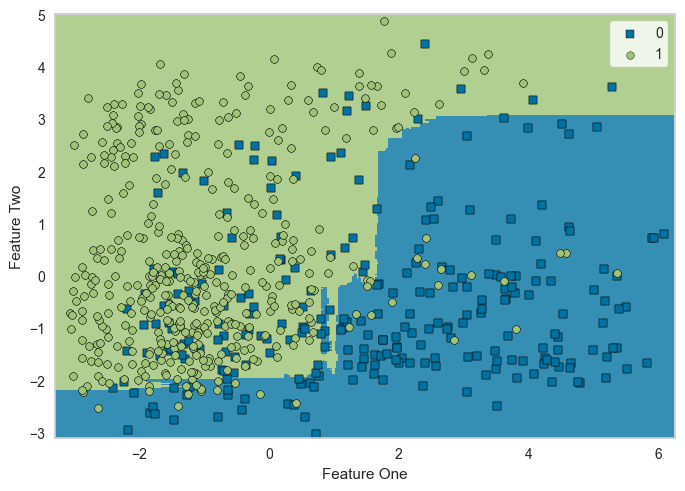

In [28]:
plot_model(tuned_xgboost, plot='boundary')

In [29]:
predict_model(tuned_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.9743,0.9914,0.9610,0.9976,0.9790,0.9459,0.9470


,Meses de vencimento,Valor do empréstimo BAM,Sexo,Estado Civil,Nivel de formacao,Anos de idade,Anos no endereco,Proprietario do inquilino,Numero de dependentes,Anos em atividade,Localizacao da empresa,Credito de Escritorio Negativo=1,Numero Funcionarios Familia,Tipo de atividade,Vendas Mensais BAM,Bad91d+=1,prediction_label,prediction_score
2170,23,11400,Female,Married,Secondary School to Grade 10,30.0,5.0,RENT,3,3.5,Region3,0,3,Personal Services,1900,1,1,0.5684
1382,20,9225,Male,Divorced,High School Diploma,37.0,2.0,RENT,3,2.0,Region1,0,1,Craftsperson,4325,1,1,0.5684
656,19,8925,Female,Married,Completed University,51.0,16.5,Own,2,9.0,Region5,0,3,Child Care,1425,0,0,0.5603
1363,21,11200,Female,Divorced,High School Diploma,44.0,3.5,RENT,3,3.5,Region3,0,4,Small Grocers,9800,1,1,0.5684
2000,18,10050,Male,Divorced,Secondary School to Grade 10,32.0,0.5,RENT,2,0.5,Region3,0,3,Convenience Store,6375,1,1,0.5684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1633,19,7175,Male,Divorced,Secondary School to Grade 10,38.0,1.0,RENT,3,1.0,Region3,0,2,Personal Services,1500,1,1,0.5684
223,18,9650,Male,Divorced,Completed University,51.0,7.0,RENT,3,6.0,Region4,0,1,Craftsperson,3525,0,0,0.5342
517,22,11625,Female,Divorced,Completed University,34.0,1.5,RENT,2,1.5,Region4,0,2,Personal Services,1775,0,0,0.5272
1877,23,8050,Female,Divorced,Secondary School to Grade 10,26.0,0.5,RENT,2,0.5,Region5,0,3,Child Care,1150,1,1,0.5684


In [30]:
final_xgboost = finalize_model(tuned_xgboost)

In [31]:
save_model(final_xgboost, 'Final_Model_xgboost')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Meses de vencimento',
                                              'Valor do empréstimo BAM',
                                              'Anos de idade',
                                              'Anos no endereco',
                                              'Numero de dependentes',
                                              'Anos em atividade',
                                              'Credito de Escritorio Negativo=1',
                                              'Numero Funcionarios Familia',
                                              'Vendas Mensais BAM'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               cop...
                                grow_policy=None, importance_type=None,
       